In [333]:
import pandas as pd
df = pd.read_csv('/Users/dongjekim/Desktop/sparta/cohort/Sample - Superstore.csv', encoding='cp1252')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [334]:
df.isnull().sum()
#결측치 없음

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [335]:
df.describe()
#매출의 평균값은 230, 표준편차는 623 
#순이익의 평균값은 28, 표준편차는 234
# 매출과 순이익 데이터의 분산이 크다. 따라서 다른 요소들과의 상관관계를 구할때 아웃라이어를 제거해주는 것이 계산에 편리할듯 싶다.

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<Axes: xlabel='Sales', ylabel='Count'>

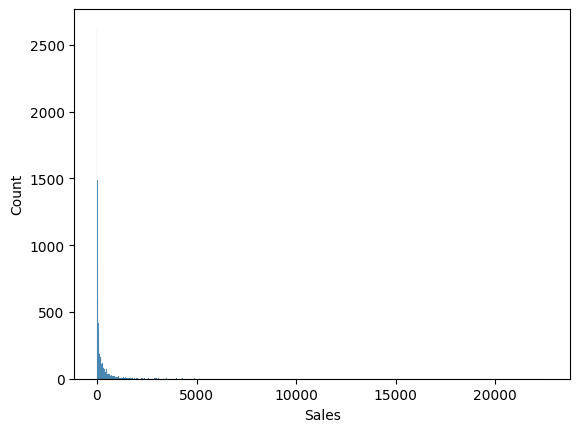

In [336]:
#매출의 히스토그램
import seaborn as sns
df.describe()
sns.histplot(data=df, x='Sales')

<Axes: xlabel='Sales', ylabel='Count'>

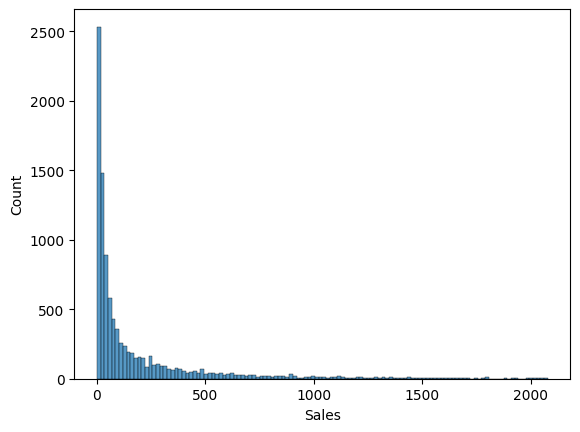

In [337]:
# scale and normalize the data
# https://www.kaggle.com/code/alexisbcook/scaling-and-normalization

from scipy import stats
import numpy as np
#get z score for each datapoint in sales
z = np.abs(stats.zscore(df['Sales']))
#set thrreshold and get list of outliers
threshold = 3
outliers = df[z > threshold]
#remove outliers
df2 = df.drop(outliers.index)
#draw histogram of sales
sns.histplot(data=df2, x='Sales')
#2000 이상의 매출을 올린 주문은 아웃라이어로 평가한다.


In [338]:
df2[(df2['Sales'] >= 0) & (df2['Sales'] <= 500)].shape[0] / df2.shape[0] * 100
#약 90% 주문이 0 - 500 사이의 매출을 올린것을 관찰할 수 있다.

89.5104895104895

<Axes: xlabel='Profit', ylabel='Count'>

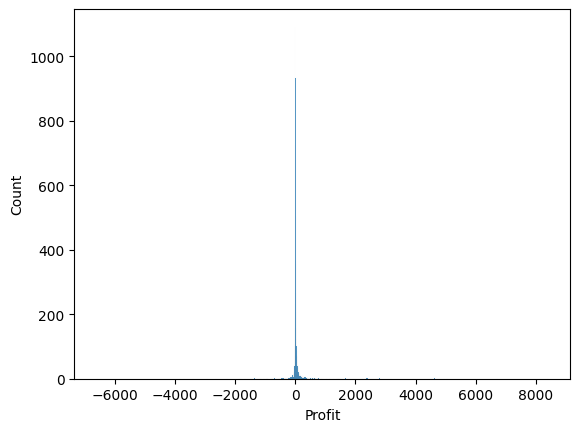

In [339]:
# 순이익의 히스토그램
sns.histplot(data=df, x='Profit')

<Axes: xlabel='Profit', ylabel='Count'>

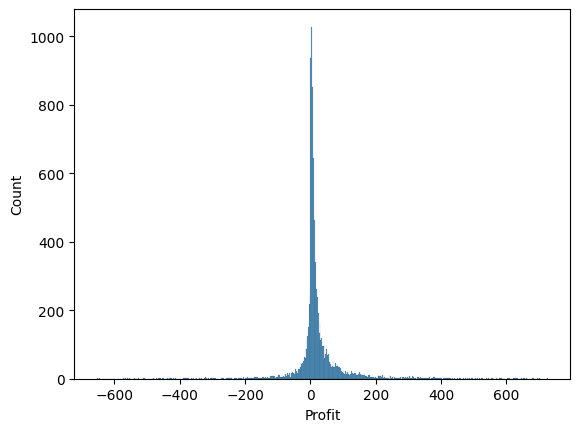

In [340]:
#get z score for each datapoint in sales
z = np.abs(stats.zscore(df['Profit']))
#set thrreshold and get list of outliers
threshold = 3
outliers = df[z > threshold]
#remove outliers
df3 = df.drop(outliers.index)
#draw histogram of sales
sns.histplot(data=df3, x='Profit')

# 적자를 낸 주문과 수익을 낸 주문이 고르게 분포한다. 적자와 수익에 영향을 주는 요소는 무엇일까?

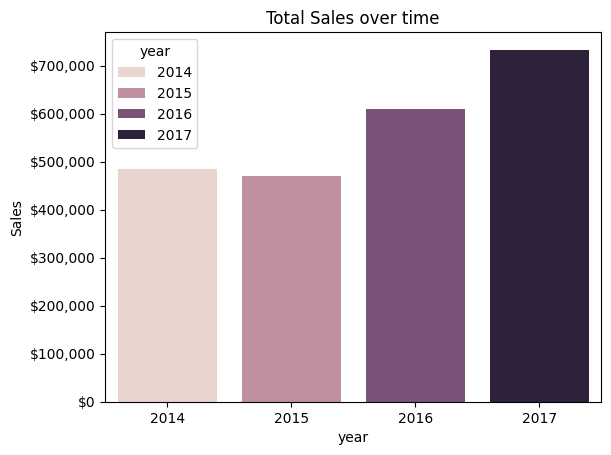

In [341]:
# 시간에 따른 매출(년도 매출 합)의 변화
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
df[['Order Date', 'Ship Date']] = df[['Order Date', 'Ship Date']].apply(pd.to_datetime, format='%m/%d/%Y')
df['year'] = df['Order Date'].dt.year
timesales = pd.DataFrame(df.groupby('year')['Sales'].agg('sum')).reset_index()

ax = sns.barplot(data=timesales, x='year', y='Sales', hue='year')
plt.title('Total Sales over time')
format = '${x:,.0f}'
tick = mtick.StrMethodFormatter(format)
ax.yaxis.set_major_formatter(tick)

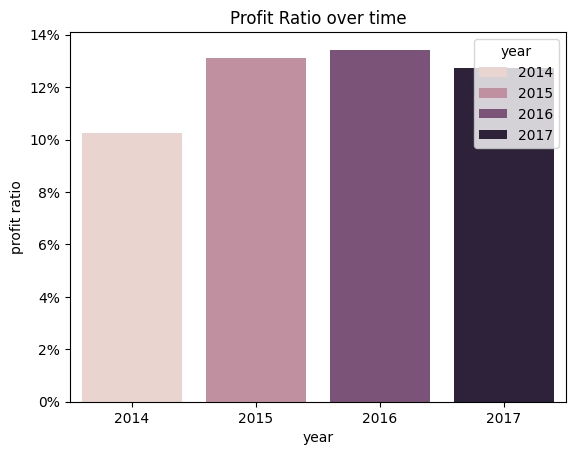

In [342]:
timewise = pd.DataFrame(df.groupby('year')['Profit'].agg('sum')).reset_index()
timewise = timewise.merge(timesales, on='year')
timewise['profit ratio'] = timewise['Profit'] / timewise['Sales'] * 100
timewise.round(1)

ax = sns.barplot(data=timewise, x='year', y='profit ratio', hue='year')
plt.title('Profit Ratio over time')
format = '{x:,.0f}%'
tick = mtick.StrMethodFormatter(format)
ax.yaxis.set_major_formatter(tick)

#매출은 증가하는 추세지만 이익은 2017년에 감소했다. 2017년의 이익률 추세를 살펴보자.

<Axes: xlabel='month'>

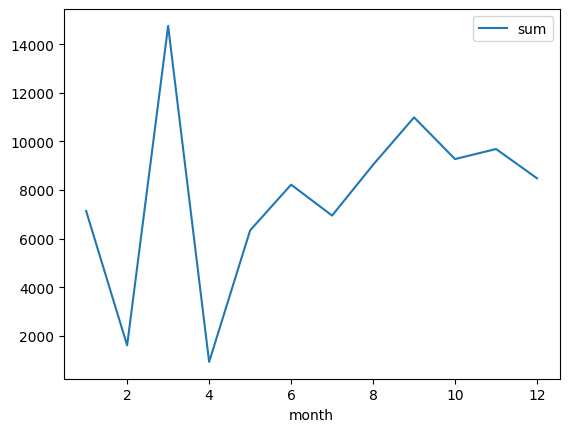

In [343]:
df['month'] = df['Order Date'].dt.month
last_year = df[df['year'] == 2017]
last_year.value_counts()
#3312 개의 2017년 데이터

last_year2 = last_year.groupby('month')['Profit'].agg(['sum'])
sns.lineplot(last_year2)

<Axes: xlabel='month', ylabel='Profit'>

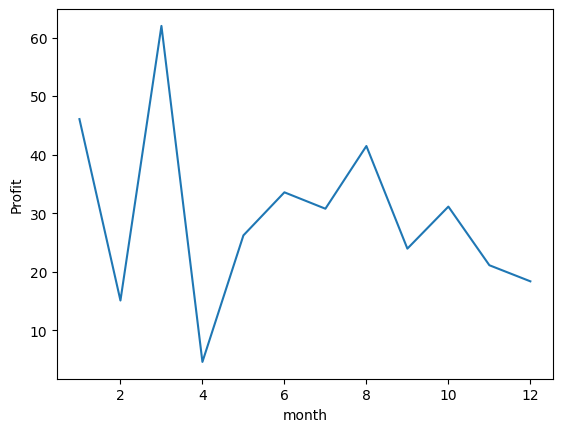

In [344]:
last_year3 = last_year.groupby('month')['Profit'].agg('mean')
last_year_sales = last_year.groupby('month')['Sales'].agg('mean')
sns.lineplot(last_year3)

<Axes: >

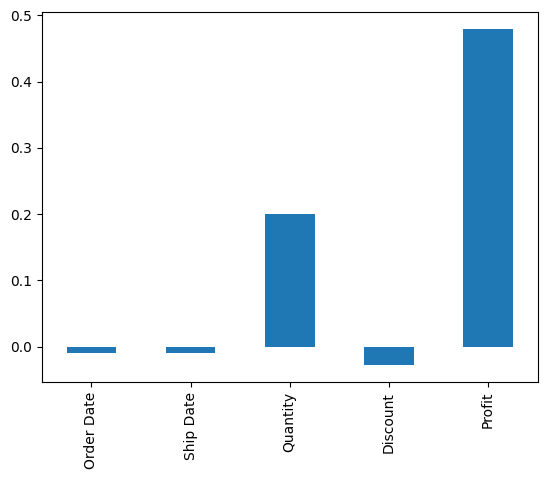

In [345]:
#매출과의 상관계수
df3 = df[['Order Date', 'Ship Date', 'Sales', 'Quantity', 'Discount', 'Profit']]
df3[['Order Date', 'Ship Date']] = df3[['Order Date', 'Ship Date']].apply(pd.to_datetime, format='%m/%d/%Y')
corr = df3.corr(method='pearson')
corr['Sales'].drop(index='Sales').plot.bar()
#순이익과 주문량의 상관계수가 상대적으로 높게 나온다.

<Axes: >

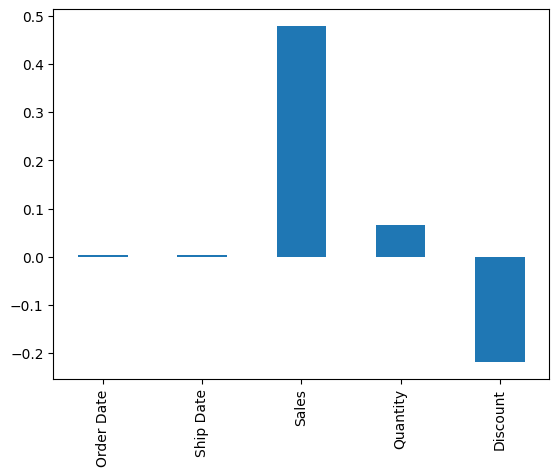

In [346]:
#순이익의 상관계수
corr = df3.corr(method='pearson')
corr['Profit'].drop(index='Profit').plot.bar()
# 할인율과 순이익은 음수의 상관계수를 가진다. 

매출과 순이익이 0.5에 근접한 상관계수를 보이므로 매출이 증가하면 순이익도 증가할 것이다.

<Axes: xlabel='Sales', ylabel='Profit'>

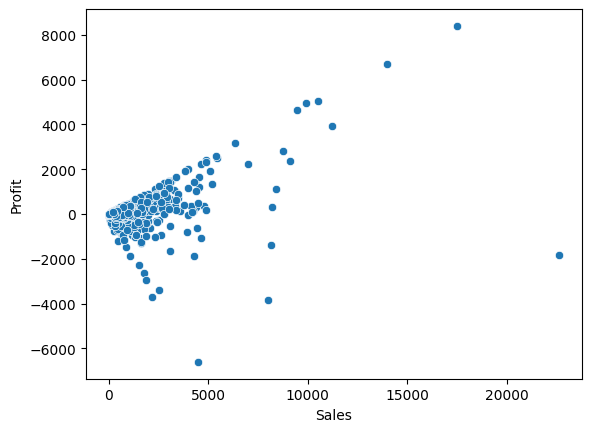

In [347]:
sns.scatterplot(data=df, x='Sales', y='Profit')

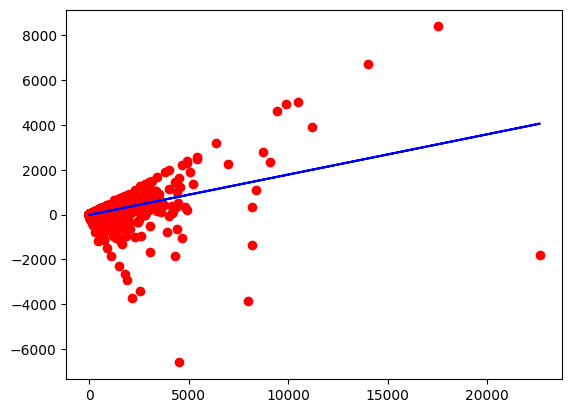

In [348]:
# 선형회귀 분석을 사용해보자
'''x : 오차 없이 측정 가능한 수학 변수 and y: 오차를 수반하는 확률 변수(Random Variable)
x의 경우 우리가 관측한 값으로서 실제로 값을 알고 있는 값으로 생각합니다.
그러나 y의 경우 우리가 추정하고자 하는 값으로 
yi = β0 + β1 * xi + εi 의 형태로 표현합니다.

여기서 보이듯이 εi 이라는 오차를 갖고 있는 값으로서, 확률변수 값으로 생각합니다.
'''
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = df[['Sales']]
y = df[['Profit']]
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color = 'blue')
plt.show()

In [349]:
reg.coef_
# 100 달러의 매출당 18 달러의 이익을 가져온다.

array([[0.18006666]])

In [350]:
count = df['Ship Mode'].value_counts()
count = round(count / 100, 2)
count


Ship Mode
Standard Class    59.68
Second Class      19.45
First Class       15.38
Same Day           5.43
Name: count, dtype: float64

/var/folders/mk/p5y6cznx60788rys6_dnljxm0000gn/T/ipykernel_2087/1704549242.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'ratio %')

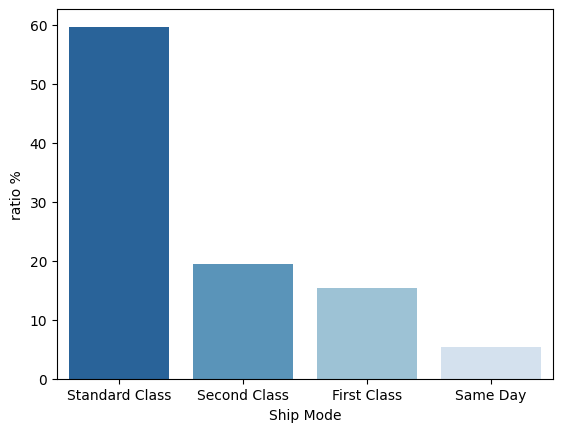

In [351]:
count = pd.DataFrame(count).reset_index()

sns.barplot(data=count, x='Ship Mode', y='count', palette="Blues_r", legend=True)
plt.ylabel("ratio %")


In [352]:
count = df['Segment'].value_counts()
count = round(count / 100, 2)
count

Segment
Consumer       51.91
Corporate      30.20
Home Office    17.83
Name: count, dtype: float64

/var/folders/mk/p5y6cznx60788rys6_dnljxm0000gn/T/ipykernel_2087/262915557.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'ratio %')

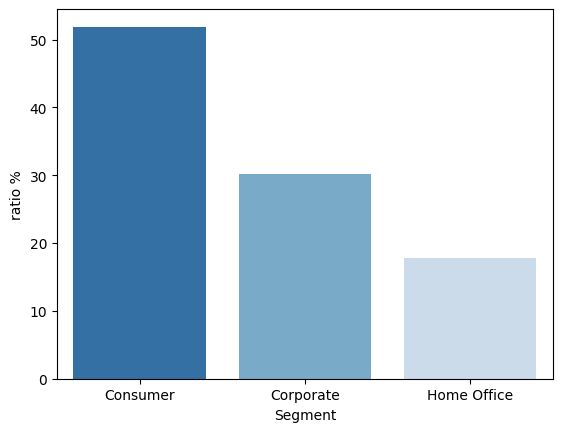

In [353]:
count = pd.DataFrame(count).reset_index()
sns.barplot(data=count, x='Segment', y='count', palette='Blues_r')
plt.ylabel('ratio %')

In [354]:
count = df['City'].value_counts()
count = round(count / 100, 2)
count

City
New York City      9.15
Los Angeles        7.47
Philadelphia       5.37
San Francisco      5.10
Seattle            4.28
                   ... 
Glenview           0.01
Missouri City      0.01
Rochester Hills    0.01
Palatine           0.01
Manhattan          0.01
Name: count, Length: 531, dtype: float64

In [355]:
count = df['Region'].value_counts()
count = round(count / 100, 2)

/var/folders/mk/p5y6cznx60788rys6_dnljxm0000gn/T/ipykernel_2087/3154541865.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Region', ylabel='count'>

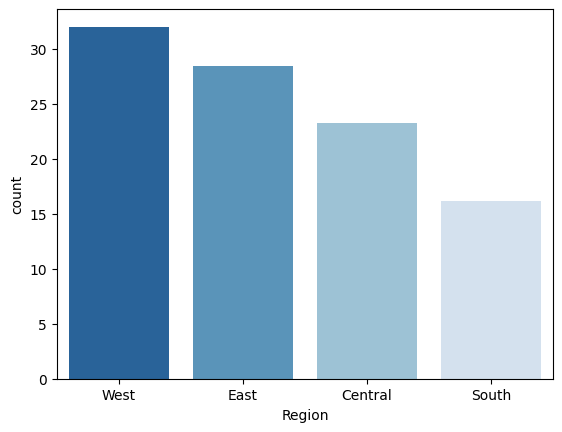

In [356]:
count = pd.DataFrame(count).reset_index()
sns.barplot(data=count, x='Region', y='count', palette='Blues_r')

In [357]:
count = df['Category'].value_counts()
count = round(count / 100, 2)

/var/folders/mk/p5y6cznx60788rys6_dnljxm0000gn/T/ipykernel_2087/4038328282.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Category', ylabel='count'>

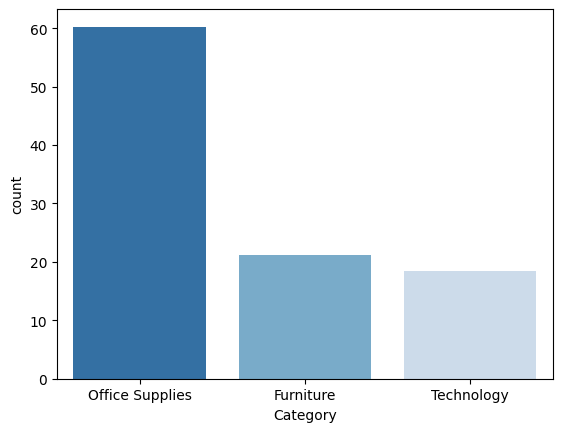

In [358]:
count = pd.DataFrame(count).reset_index()
sns.barplot(data=count, x='Category', y='count', palette='Blues_r')

In [359]:
count = df['Sub-Category'].value_counts()
count = round(count / 100, 2)

/var/folders/mk/p5y6cznx60788rys6_dnljxm0000gn/T/ipykernel_2087/4006177618.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Sub-Category', ylabel='count'>

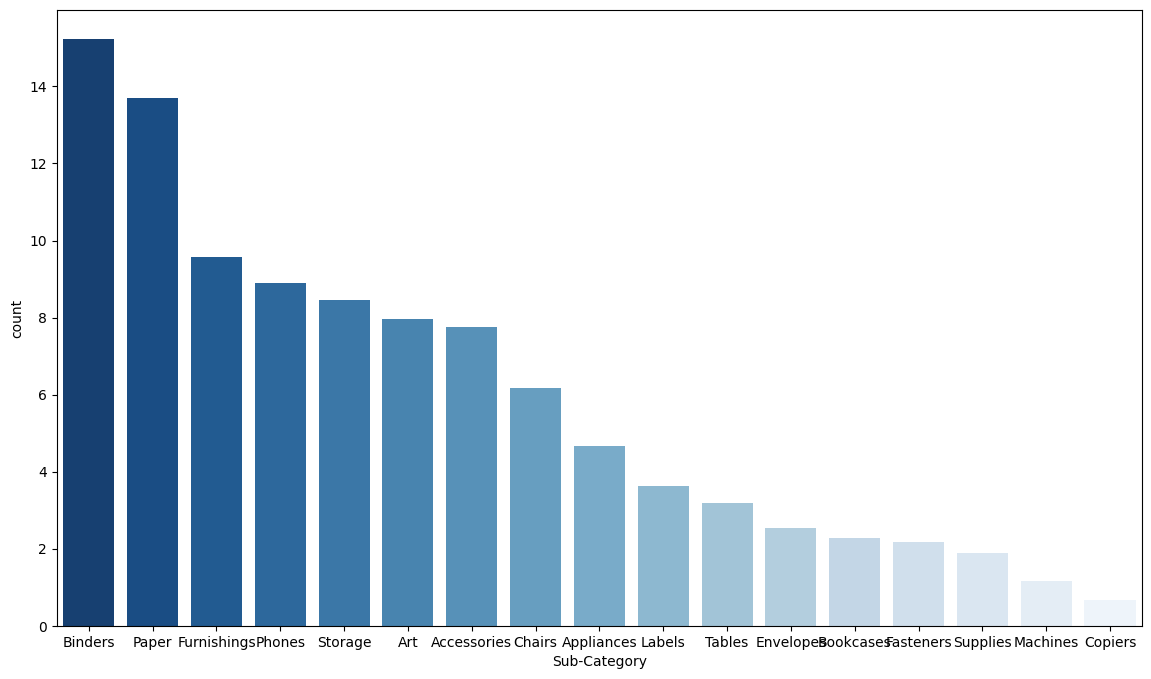

In [360]:
count = pd.DataFrame(count).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=count, x='Sub-Category', y='count', palette='Blues_r')

<Axes: ylabel='Profit'>

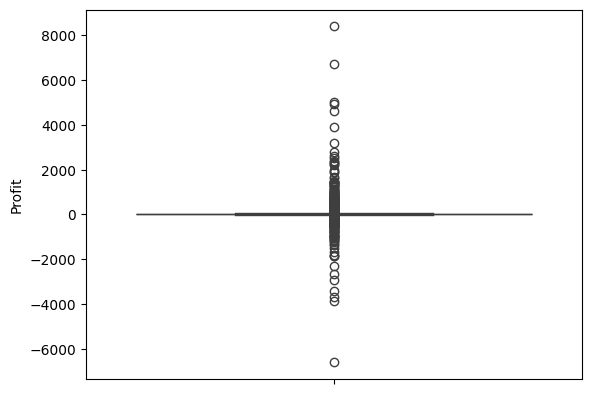

In [361]:
#numeric = sales, quantity, discount, profit, year, month
df.dtypes
sns.boxplot(data=df['Profit'])
#아웃라이어가 너무 많다. IQR 범위를 벗어나면 제거해주자.

<Axes: ylabel='Profit'>

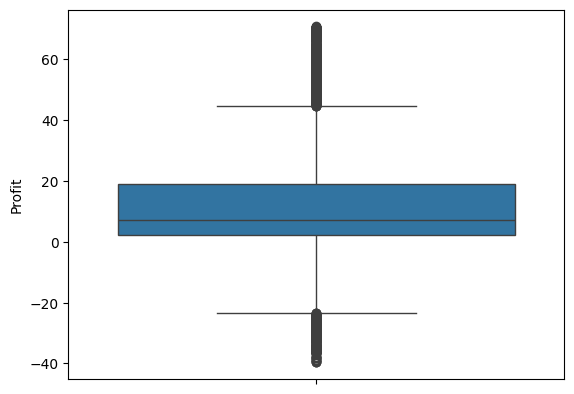

In [362]:
sorts = df['Profit'].sort_values()
q1 = sorts.quantile(0.25)
q3 = sorts.quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
sorts = sorts[(sorts >= lower) & (sorts <= upper)]
sns.boxplot(data=sorts)

<Axes: ylabel='Profit'>

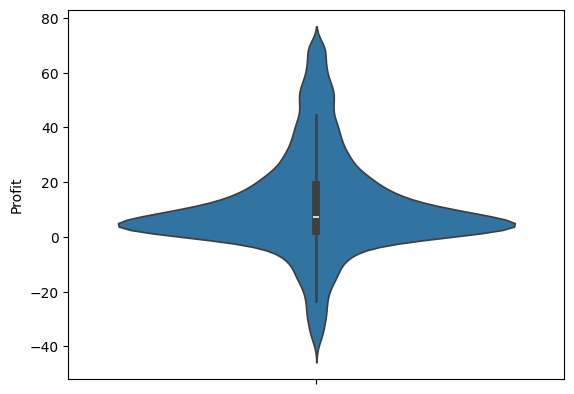

In [363]:
sns.violinplot(data=sorts)

/var/folders/mk/p5y6cznx60788rys6_dnljxm0000gn/T/ipykernel_2087/1127035130.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




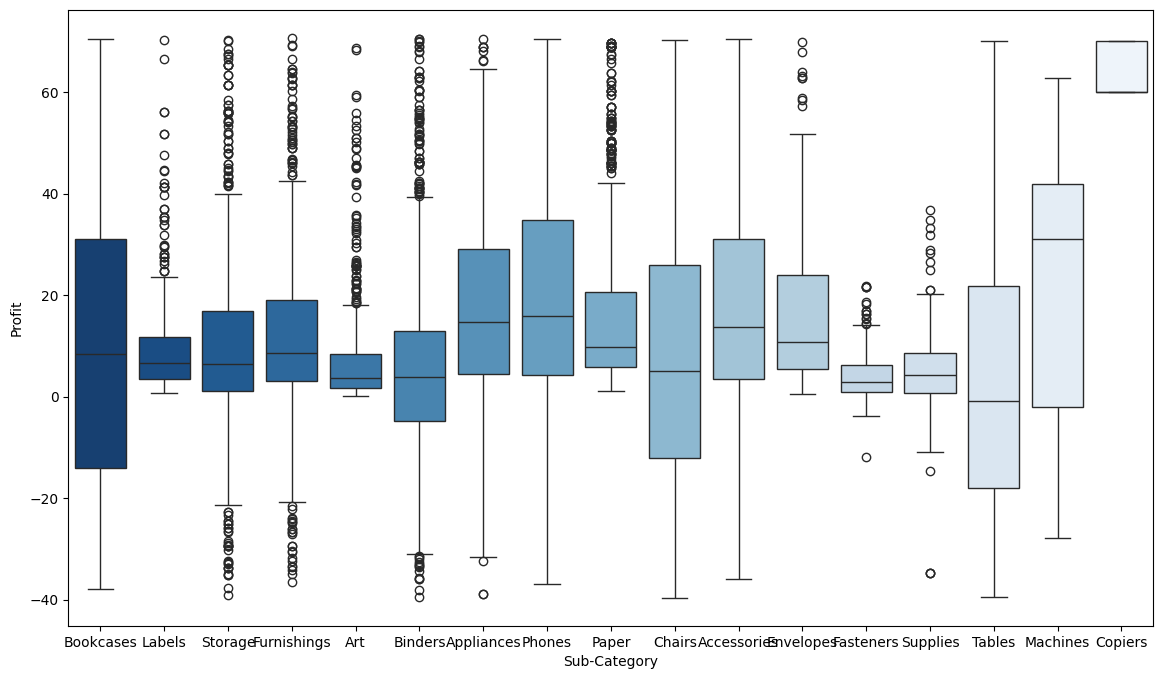

In [364]:
# check profit by sub-category since each sub-category is evenly distributed, 
# maybe (just maybe) there is other reason of higher profit other than higher order count
# if there is difference between ratio of profit by category and ratio of order count by category, then maybe.
profit_df = df[(df['Profit'] >= lower) & (df['Profit'] <= upper)]
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=profit_df, y='Profit', x='Sub-Category',palette='Blues_r')

In [365]:
copiers = df[df['Sub-Category'] == 'Copiers'].shape[0]
machines = df[df['Sub-Category'] == 'Machines'].shape[0]
print(copiers, 'copiers', machines, 'machines')

68 copiers 115 machines


In [366]:
# df['Category'] = df['Category'].replace('Furniture', 0)
# df['Category'] = df['Category'].replace('Technology', 1)
# df['Category'] = df['Category'].replace('Office Supplies', 2)

tmp = df.groupby(['Segment', 'Category', 'Quantity'])['Order ID'].count().reset_index()
tmp

,Segment,Category,Quantity,Order ID
0,Consumer,Furniture,1,105
1,Consumer,Furniture,2,257
2,Consumer,Furniture,3,287
3,Consumer,Furniture,4,130
4,Consumer,Furniture,5,140
...,...,...,...,...
118,Home Office,Technology,9,5
119,Home Office,Technology,10,2
120,Home Office,Technology,11,1
121,Home Office,Technology,13,1


In [367]:
import plotly.express as px

fig = px.sunburst(tmp, path=['Segment', 'Category'], values='Order ID',
                  color='Segment', width=500, height=500)
fig.update_traces(textinfo="label+percent parent")
fig.show()

In [368]:
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

df['Sales'].iplot(kind='hist', xTitle='sales', yTitle='count', title='Sales Distribution')

In [369]:
#to_period: Y, M, D, 2M, 15min
df['month_year'] = df['Order Date'].dt.to_period('M')
df2 = df[['Profit', 'Sales', 'month_year']].groupby('month_year').mean()
df2
df2.iplot(kind='bar')

In [370]:
#day of week
df['day_of_week'] = df['Order Date'].dt.dayofweek
df['day_of_week'] = df['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
sorts = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df = df[df['Order Date'].dt.year == 2017]
df2 = df[['Sales', 'Profit', 'day_of_week']].set_index('day_of_week')
df2 = df2.groupby('day_of_week').mean().reindex(sorts)

df2.iplot(kind='bar', xTitle='Day of Week', yTitle='Average during 2017')

In [371]:
#boxplot using plotly and cufflinks = use pivot
df.pivot(columns='Category', values='Sales').iplot(kind='box')

In [372]:
df2[['Sales', 'Profit']].iplot(y='Sales', mode='lines+markers', secondary_y='Profit',
                               title='Sale and Profit over time')

In [373]:
tmp = df[['Sales', 'Profit', 'month_year']].groupby('month_year').sum()
tmp[['Sales', 'Profit']].iplot(y='Sales', 
                               mode='lines+markers', 
                               secondary_y='Profit',
                               title='Sale and Profit during 2017')

In [384]:
import plotly.express as px
fig = px.scatter(df, y='Sales', x='Order Date', color='Category', symbol='Category')
fig.show()


In [389]:
df['month_year'] = df['Order Date'].dt.strftime('%Y-%m')
tmp = df[['Sales', 'month_year', 'Category']].groupby(['month_year', 'Category']).agg('mean').reset_index()
fig = px.line(tmp, y='Sales', x='month_year', color='Category', symbol='Category')
fig.show()

<Axes: >

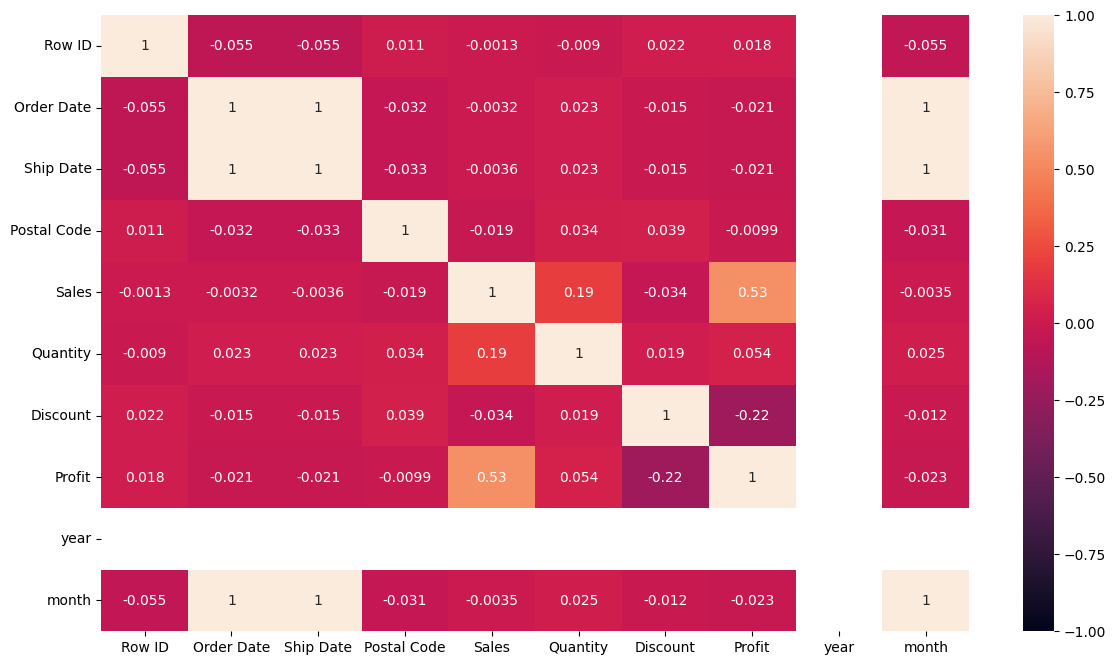

In [377]:
df.dtypes
numerics = df[['Row ID', 'Order Date', 'Ship Date', 'Postal Code', 'Sales', 'Quantity', 'Discount', 
              'Profit', 'year', 'month']]
corrs = numerics.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corrs, vmin=-1, vmax=1, annot=True)

In [396]:
import plotly.express as px
fig = px.scatter(df, x='month_year', y='Sales', size='Sales', color='City')
fig.show()

In [412]:
#ployly choropleth
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

df['Code'] = df['State'].map(code)
tmp = df[['Code', 'Sales']].groupby('Code').mean().reset_index()
plt.figure(figsize=(14, 8))
fig = px.choropleth(tmp,
                    locations='Code',
                    color='Sales',
                    color_continuous_scale='Greens',
                    hover_name='Code',
                    locationmode='USA-states',
                    labels={'Average Sales':'Sales'},
                    scope='usa')
fig.add_scattergeo(locations=tmp['Code'], locationmode='USA-states', text=tmp['Code'],mode='text')
fig.update_layout(title={'text':'Average Sales by State', 
                         'xanchor':'center',
                         'yanchor':'top',
                         'x':0.5})
fig.show()

<Figure size 1400x800 with 0 Axes>